# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

**Objectives:**
- Figure out which plan brings in more revenue 
    - This can be analyzed on a per user basis, and also as a whole (total) 
- Analyze user usage behavior for messages, internet and phone services 

**Plan:**
- First clean, validate and organize the data (i.e. add whatever columns are needed) 
- Do EDA to get a sense of the data (distributions, ranges, frequencies etc.)
- Plot some charts to compare metrics from the two plans 
- Do statistical testing to see if the differences between the plans are significant 
- Add some qualitative business judgement to recommendations

## Initialization

In [1]:
# Loading all the libraries
from scipy import stats as st
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Increase the row display limit 
pd.set_option('display.max_rows', 500)

# Turn off grids because it doesn't align
plt.rcParams['axes.grid'] = False

## Load data

In [3]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

In this section I am making any data type changes necessary, identifying missing values, and doing some EDA.

### megaline_calls preparation

In [4]:
# Need to turn call_date into datetime format. No nulls 
calls.info()
calls.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
48238,1174_215,1174,2018-08-20,1.39


In [5]:
# Changing call_date to datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()
calls.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
127964,1459_108,1459,2018-12-11,9.53


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'call_date'}>]], dtype=object)

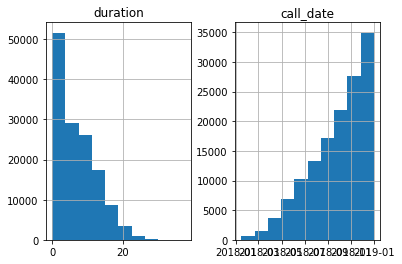

In [6]:
# Get a quick view of the data 
#     Duration slopes down which makes sense, more short calls than longer 
#     More calls as the dates go on, loooks like growing usage and user base 
calls[['duration','call_date']].hist()

### megaline_internet preparation

In [7]:
# Need to turn session_date into datetime format. No nulls
internet.info()
internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
30365,1138_604,1138,2018-05-09,0.00
83305,1389_202,1389,2018-07-26,234.12
12250,1059_361,1059,2018-12-13,342.93
2182,1010_366,1010,2018-06-24,82.99
32066,1145_202,1145,2018-06-19,5.93


In [8]:
# Changing session_date to datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()
internet.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
55496,1251_307,1251,2018-10-27,556.61


array([[<AxesSubplot:title={'center':'mb_used'}>,
        <AxesSubplot:title={'center':'session_date'}>]], dtype=object)

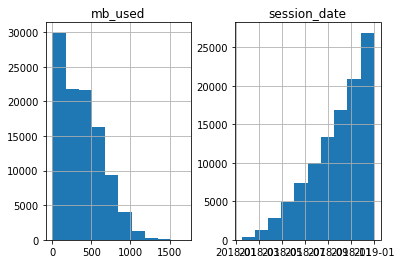

In [9]:
# Same distribution as for calls 
internet[['mb_used','session_date']].hist()

### megaline_messages preparation

In [10]:
# Need to turn message_date into datetime format
messages.info()
messages.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
37871,1250_124,1250,2018-12-05


In [11]:
# Changing message_date to datetime 
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()
messages.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
18026,1119_522,1119,2018-12-03


array([[<AxesSubplot:title={'center':'message_date'}>]], dtype=object)

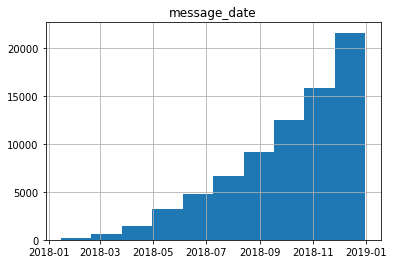

In [12]:
# Same thing happening here at first glance, usage growth 
messages[['message_date']].hist()

### megaline_plans preparation

In [13]:
# No changes needed 
plans.info()
plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### megaline_users preparation

In [14]:
# Most users don't have churn_date because they are current customers 
# Change reg_date to datetime 
# This is the demographic data that we can compare later from the summed up monthly tables with revenue 
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [15]:
users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

In [16]:
# changing the dates to datetime 
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()
users.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaT


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'reg_date'}>],
       [<AxesSubplot:title={'center':'churn_date'}>, <AxesSubplot:>]],
      dtype=object)

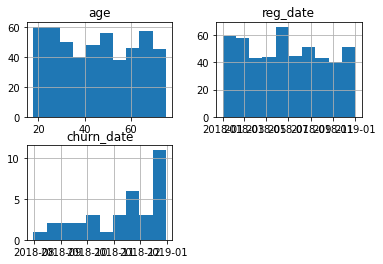

In [17]:
# At first glance, pretty even age distribution 
# pretty even reg_date, makes sense with the other data (usage growing b/c user base steadily growing) 
# Churn date increasing over time, but this is a small sample of 34 that may not be representative of churned users
# Looks like there was a big churn spike towards the end, will investigate
users[['age','reg_date','churn_date']].hist()

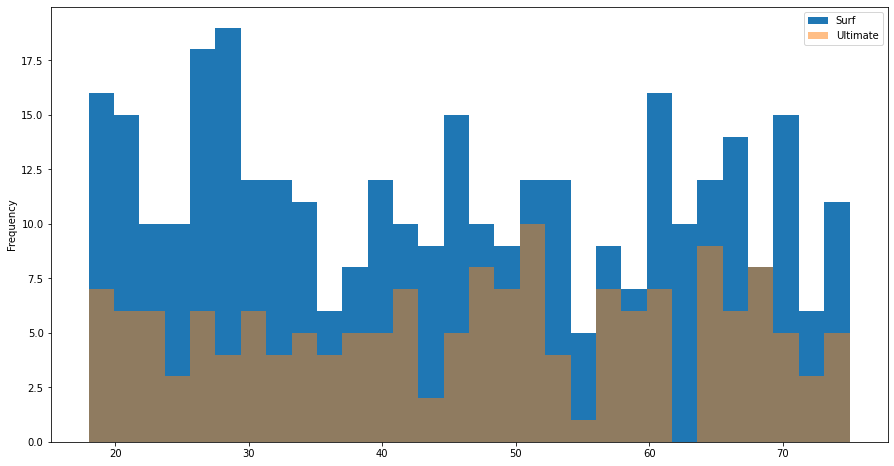

In [18]:
# Not much pattern difference between plans. 
#     Looks like Surf has slightly more concentration amoung younger users 
users[users['plan']=='surf']['age'].plot(kind='hist', figsize=[15,8], bins=30)
users[users['plan']=='ultimate']['age'].plot(kind='hist', alpha=0.5, bins=30)

plt.legend(['Surf','Ultimate'])
plt.show()

In [19]:
# Surf has slightly more younger users, but not by much (5% of total)

age_groups = users.groupby([(users['age'] >= 30),'plan'])['user_id'].count().unstack(level='plan')
age_groups.index = ['Under 30', 'Above 30']

# total_row = age_groups.sum(numeric_only=True).rename('Total')
# age_groups = age_groups.append(total_row)

# add the percentage of users in each city per plan
age_groups = age_groups.assign(pct_surf = age_groups['surf'] / age_groups['surf'].sum())
age_groups = age_groups.assign(pct_ult = age_groups['ultimate'] / age_groups['ultimate'].sum())
age_groups

plan,surf,ultimate,pct_surf,pct_ult
Under 30,88,32,0.259587,0.198758
Above 30,251,129,0.740413,0.801242


## Plans

Checking for any duplicates and adding columns in this section, as well as doing more EDA.

In [20]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [21]:
# Print a sample of data for plans

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Observations:**
- Information all looks right, I assume that 15.36 / 30.72 is the actual limit for data included each month, and not an error
- Will simply use logic that references this column later on to calculate included vs. excess usage

## Users

In [22]:
# Print the general/summary information about the users' DataFrame

print(users.info())
print(users.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


In [23]:
# Print a sample of data for users
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
418,1418,Hal,Barnes,40,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-19,surf,NaT
442,1442,Terrell,Caldwell,66,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-25,ultimate,NaT
10,1010,Wilber,Blair,52,"Dallas-Fort Worth-Arlington, TX MSA",2018-03-09,surf,NaT
148,1148,Dwana,Moore,67,"Columbia, SC MSA",2018-11-04,surf,NaT
434,1434,Kai,Barr,18,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-06,surf,NaT
455,1455,Jude,Fischer,20,"Denver-Aurora-Lakewood, CO MSA",2018-08-13,surf,NaT
33,1033,Latoyia,Moran,28,"Oklahoma City, OK MSA",2018-05-30,ultimate,NaT
377,1377,Vallie,Conway,18,"Rochester, NY MSA",2018-03-27,surf,NaT
480,1480,Jasper,Buchanan,46,"St. Louis, MO-IL MSA",2018-12-13,surf,NaT
21,1021,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,NaT


In [24]:
# Checking geographic distribution of users
#     Looks like users are heavily concentrated in certain areas (same as US population centers)
#     I wonder if there are differences between plans
users['city'].value_counts().sort_values(ascending=False)

New York-Newark-Jersey City, NY-NJ-PA MSA           80
Los Angeles-Long Beach-Anaheim, CA MSA              29
Dallas-Fort Worth-Arlington, TX MSA                 21
Chicago-Naperville-Elgin, IL-IN-WI MSA              19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     17
Atlanta-Sandy Springs-Roswell, GA MSA               14
Seattle-Tacoma-Bellevue, WA MSA                     13
Boston-Cambridge-Newton, MA-NH MSA                  12
Minneapolis-St. Paul-Bloomington, MN-WI MSA         11
San Francisco-Oakland-Berkeley, CA MSA              11
Washington-Arlington-Alexandria, DC-VA-MD-WV MSA    11
Miami-Fort Lauderdale-West Palm Beach, FL MSA       11
Detroit-Warren-Dearborn, MI MSA                     10
Riverside-San Bernardino-Ontario, CA MSA             9
Phoenix-Mesa-Chandler, AZ MSA                        9
Charlotte-Concord-Gastonia, NC-SC MSA                8
Portland-Vancouver-Hillsboro, OR-WA MSA              8
San Diego-Chula Vista-Carlsbad, CA MSA               8
Cincinnati

In [25]:
# Looks like the plans have similar concentrations, but not entirely 
users.groupby('plan')['city'].value_counts().unstack(level='plan').sort_values(by='surf',ascending=False)

plan,surf,ultimate
city,,
"New York-Newark-Jersey City, NY-NJ-PA MSA",60.0,20.0
"Dallas-Fort Worth-Arlington, TX MSA",18.0,3.0
"Los Angeles-Long Beach-Anaheim, CA MSA",18.0,11.0
"Boston-Cambridge-Newton, MA-NH MSA",11.0,1.0
"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",11.0,6.0
"Chicago-Naperville-Elgin, IL-IN-WI MSA",11.0,8.0
"Seattle-Tacoma-Bellevue, WA MSA",9.0,4.0
"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",8.0,3.0
"Portland-Vancouver-Hillsboro, OR-WA MSA",7.0,1.0


In [26]:
# Getting a better look by adding a total and percentage column

# group the data by plan and city and count the number of users
city_counts = users.groupby('plan')['city'].value_counts().unstack(level='plan')

# add the sum of users in each city, axis = 1 sums across instead of down
city_counts = city_counts.assign(total=city_counts.sum(axis=1))

# add the percentage of users in each city per plan
city_counts = city_counts.assign(pct_surf = city_counts['surf'] / city_counts['surf'].sum())
city_counts = city_counts.assign(pct_ult = city_counts['ultimate'] / city_counts['ultimate'].sum())
city_counts = city_counts.assign(pct_total = city_counts['total'] / city_counts['total'].sum())

city_counts.sort_values(by='total',ascending=False)

# Somewhat similar distribution
#     Ultimate has more share of users in Chicago and Atlanta
#     Surf has a higher share of its users in Dallas
# Both have high concentrations in NY/NJ and LA areas 

plan,surf,ultimate,total,pct_surf,pct_ult,pct_total
city,,,,,,
"New York-Newark-Jersey City, NY-NJ-PA MSA",60.0,20.0,80.0,0.176991,0.124224,0.160
"Los Angeles-Long Beach-Anaheim, CA MSA",18.0,11.0,29.0,0.053097,0.068323,0.058
"Dallas-Fort Worth-Arlington, TX MSA",18.0,3.0,21.0,0.053097,0.018634,0.042
"Chicago-Naperville-Elgin, IL-IN-WI MSA",11.0,8.0,19.0,0.032448,0.049689,0.038
"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",11.0,6.0,17.0,0.032448,0.037267,0.034
"Atlanta-Sandy Springs-Roswell, GA MSA",6.0,8.0,14.0,0.017699,0.049689,0.028
"Seattle-Tacoma-Bellevue, WA MSA",9.0,4.0,13.0,0.026549,0.024845,0.026
"Boston-Cambridge-Newton, MA-NH MSA",11.0,1.0,12.0,0.032448,0.006211,0.024
"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",8.0,3.0,11.0,0.023599,0.018634,0.022


In [27]:
# Any duplicate city names? No
sorted(users['city'].unique())

['Albany-Schenectady-Troy, NY MSA',
 'Albuquerque, NM MSA',
 'Atlanta-Sandy Springs-Roswell, GA MSA',
 'Austin-Round Rock-Georgetown, TX MSA',
 'Bakersfield, CA MSA',
 'Baltimore-Columbia-Towson, MD MSA',
 'Baton Rouge, LA MSA',
 'Birmingham-Hoover, AL MSA',
 'Boston-Cambridge-Newton, MA-NH MSA',
 'Bridgeport-Stamford-Norwalk, CT MSA',
 'Buffalo-Cheektowaga, NY MSA',
 'Cape Coral-Fort Myers, FL MSA',
 'Charleston-North Charleston, SC MSA',
 'Charlotte-Concord-Gastonia, NC-SC MSA',
 'Chicago-Naperville-Elgin, IL-IN-WI MSA',
 'Cincinnati, OH-KY-IN MSA',
 'Cleveland-Elyria, OH MSA',
 'Colorado Springs, CO MSA',
 'Columbia, SC MSA',
 'Columbus, OH MSA',
 'Dallas-Fort Worth-Arlington, TX MSA',
 'Dayton-Kettering, OH MSA',
 'Denver-Aurora-Lakewood, CO MSA',
 'Detroit-Warren-Dearborn, MI MSA',
 'El Paso, TX MSA',
 'Fresno, CA MSA',
 'Grand Rapids-Kentwood, MI MSA',
 'Greensboro-High Point, NC MSA',
 'Houston-The Woodlands-Sugar Land, TX MSA',
 'Indianapolis-Carmel-Anderson, IN MSA',
 'Jackson

**Observations:**
- Churn date can have NaTs for those that are still enrolled
- Other columns look fine

### Fix Data

Checking for duplicates and other errors here

In [28]:
# No duplicates
users.duplicated().sum()

0

In [29]:
# Should only be one user_id for each user
users['user_id'].duplicated().sum()

0

In [30]:
# Checking less obvious dupes (people can have same name but unlikely in 500 person sample)
users[['first_name','last_name']].duplicated().sum()

0

In [31]:
# Checking to see if any of the dates are incorrect
users[users['churn_date'] <= users['reg_date']]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


### Enrich Data

Adding the `lifetime` of the user for those that churned

In [32]:
# Can do analysis on this set of churned users to see differences vs. non-churned
#     Later can look at lifetime distribution and churn rates
users['lifetime'] = users['churn_date'] - users['reg_date']
users[~users['lifetime'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,lifetime
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,21 days
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,141 days
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,140 days
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30,7 days
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07,201 days
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31,254 days
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,61 days
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18,53 days
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11,160 days
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12,43 days


In [33]:
users['lifetime'] = users['lifetime'].dt.days
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   lifetime    34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 35.3+ KB


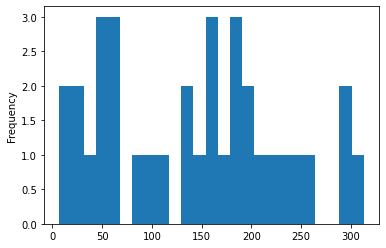

In [34]:
# Lifetime distribution
# No discernable pattern
users['lifetime'].plot(kind='hist',bins=25)
plt.show()

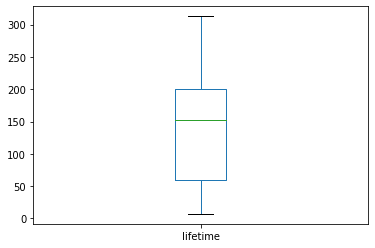

In [35]:
# Since our data is only a year long, it won't show churn stats for users that take longer than a year to churn
#     Most users that did churn did so in around half a year 
users['lifetime'].plot(kind='box')
plt.show()

In [36]:
# Plan of churned users matches distribution of total group (~2/3 surf 1/2 ultimate)
users[~users['lifetime'].isna()]['plan'].value_counts()

surf        23
ultimate    11
Name: plan, dtype: int64

## Calls

In [37]:
# Print the general/summary information about the calls' DataFrame

print(calls.info())
print(calls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


In [38]:
# Print a sample of data for calls

calls.sample(10)

,id,user_id,call_date,duration
34765,1132_29,1132,2018-08-27,9.77
125078,1440_594,1440,2018-11-08,9.70
13783,1058_421,1058,2018-11-11,0.00
18927,1072_376,1072,2018-08-10,0.00
71356,1254_246,1254,2018-08-14,20.79
9823,1044_79,1044,2018-10-15,2.40
89190,1324_1261,1324,2018-06-06,0.00
59039,1214_108,1214,2018-01-30,0.00
105883,1373_363,1373,2018-12-21,5.46
100025,1358_460,1358,2018-10-15,4.16


In [39]:
# Investigating id syntax in the 2 cells here 
users[users['user_id']==1208]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,lifetime
208,1208,Enrique,Ramirez,44,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-07-17,surf,NaT,NaN


In [40]:
calls[calls['user_id']==1208]

,id,user_id,call_date,duration
57618,1208_0,1208,2018-12-11,14.21
57619,1208_1,1208,2018-12-04,15.30
57620,1208_2,1208,2018-12-24,2.92
57621,1208_3,1208,2018-12-05,0.00
57622,1208_4,1208,2018-12-10,11.49
57623,1208_5,1208,2018-12-19,0.00
57624,1208_6,1208,2018-12-03,13.10
57625,1208_7,1208,2018-12-18,0.00
57626,1208_8,1208,2018-12-21,1.05
57627,1208_9,1208,2018-12-14,11.43


**Observations:**
- The id column is a string combining the user_id and something else
- At first I thought it might be the cumulative calls made, but the order is not chronological (see user 1335)
- There is no relation to duration either it seems
- We could split it on the underscore and take the max of the 2nd one to find the total amount of calls made, but we could also just use a max function per user as well aggregated

### Fix data

In [41]:
# Check for dupes
calls.duplicated().sum()

0

In [42]:
# Should only be one id each call
calls['id'].duplicated().sum()

0

In [43]:
# Checking less obvious dupes
calls[['user_id','call_date','duration']].duplicated().sum()

5882

In [44]:
# A really small number of calls, we can just ignore. Won't impact 137K calls
calls[(calls[['user_id','call_date','duration']].duplicated()) & (calls['duration']>0)].count()

id           62
user_id      62
call_date    62
duration     62
dtype: int64

In [45]:
# Checked the 62 duplicated calls with this, and also looked into the actual rows. Dupes aren't sequential in id 
calls[(calls[['user_id','call_date','duration']].duplicated()) & (calls['duration']>0)].sort_values('user_id')

# Super small vs. total, not material
print(calls[(calls[['user_id','call_date','duration']].duplicated()) & (calls['duration']>0)]['duration'].sum())
print(calls['duration'].sum())

394.74000000000007
929150.2599999998


In [46]:
calls[calls['user_id']==1005].sort_values('call_date')

,id,user_id,call_date,duration
936,1005_27,1005,2018-12-22,0.00
938,1005_29,1005,2018-12-23,23.33
965,1005_56,1005,2018-12-23,9.07
963,1005_54,1005,2018-12-23,7.20
912,1005_3,1005,2018-12-23,0.00
958,1005_49,1005,2018-12-23,0.00
956,1005_47,1005,2018-12-23,1.32
933,1005_24,1005,2018-12-23,4.57
945,1005_36,1005,2018-12-23,0.93
944,1005_35,1005,2018-12-23,20.68


### Enrich data

Adding a column for actual duration charged

In [47]:
# Create a conditional column that rounds calls > 0 minutes to the next highest minute. 

# Can also write as np.ceil(calls['duration'])
calls['charged_duration'] = calls['duration'].apply(np.ceil)

# Check to see if it worked
calls[calls['duration'] < 1]

,id,user_id,call_date,duration,charged_duration
19,1001_4,1001,2018-12-05,0.00,0.0
25,1001_13,1001,2018-12-24,0.00,0.0
28,1001_23,1001,2018-10-27,0.98,1.0
31,1001_30,1001,2018-10-17,0.00,0.0
32,1001_31,1001,2018-11-03,0.00,0.0
...,...,...,...,...,...
137720,1499_189,1499,2018-12-27,0.00,0.0
137722,1499_191,1499,2018-12-24,0.00,0.0
137725,1499_194,1499,2018-10-31,0.00,0.0
137727,1499_196,1499,2018-11-22,0.27,1.0


## Messages

In [48]:
# Print the general/summary information about the messages' DataFrame

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [49]:
# Print a sample of data for messages

messages.sample(10)

,id,user_id,message_date
51785,1335_376,1335,2018-09-27
61728,1385_192,1385,2018-10-08
5042,1046_104,1046,2018-06-23
27907,1172_364,1172,2018-09-22
31635,1196_118,1196,2018-10-22
62211,1391_209,1391,2018-09-27
21134,1132_346,1132,2018-08-23
19352,1125_20,1125,2018-12-23
8649,1064_53,1064,2018-11-18
71472,1466_124,1466,2018-12-26


In [50]:
messages.value_counts('user_id')

user_id
1132    1288
1328    1233
1324    1175
1470    1056
1077     804
1028     756
1076     740
1336     690
1362     672
1335     654
1101     648
1381     624
1339     608
1055     608
1144     601
1247     600
1043     599
1374     576
1384     570
1126     569
1174     552
1059     533
1320     531
1467     531
1439     528
1343     528
1254     525
1061     522
1261     503
1264     500
1159     490
1434     482
1172     475
1435     472
1346     465
1114     464
1133     455
1203     450
1145     448
1326     444
1331     440
1036     438
1405     434
1316     433
1293     432
1408     429
1454     426
1098     426
1433     420
1120     417
1110     416
1491     409
1057     400
1329     397
1079     396
1195     388
1475     378
1347     372
1011     371
1069     370
1119     366
1088     358
1193     358
1155     355
1199     351
1385     350
1167     344
1196     341
1215     340
1460     339
1382     336
1066     336
1130     336
1412     336
1060     330
1111     322
1466

In [51]:
users[users['user_id']==1155]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,lifetime
155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,NaT,NaN


In [52]:
messages[messages['user_id']==1155]

,id,user_id,message_date
25642,1155_0,1155,2018-03-30
25643,1155_1,1155,2018-03-17
25644,1155_2,1155,2018-08-01
25645,1155_3,1155,2018-10-26
25646,1155_4,1155,2018-04-10
25647,1155_5,1155,2018-04-28
25648,1155_6,1155,2018-11-12
25649,1155_7,1155,2018-09-16
25650,1155_9,1155,2018-05-16
25651,1155_10,1155,2018-09-28


**Observations:**
- Same as for calls, the second part of `id` has no order

### Fix data

In [53]:
messages.duplicated().sum()

0

## Internet

In [54]:
# Print the general/summary information about the internet DataFrame

internet.info()
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [55]:
# Print a sample of data for the internet traffic

internet.sample(10)

,id,user_id,session_date,mb_used
20337,1094_417,1094,2018-12-29,475.25
100302,1475_95,1475,2018-08-24,0.00
25826,1120_399,1120,2018-04-22,535.70
23444,1109_22,1109,2018-07-19,178.31
54358,1246_259,1246,2018-08-04,941.81
19600,1088_407,1088,2018-07-03,428.85
79326,1369_67,1369,2018-12-26,0.00
20111,1090_350,1090,2018-10-01,64.10
97663,1460_285,1460,2018-10-26,545.01
51365,1231_294,1231,2018-08-26,146.49


In [56]:
internet[internet['user_id']==1181]

,id,user_id,session_date,mb_used
39936,1181_1,1181,2018-12-02,372.91
39937,1181_2,1181,2018-08-14,233.42
39938,1181_3,1181,2018-07-13,383.27
39939,1181_5,1181,2018-07-09,367.53
39940,1181_6,1181,2018-06-22,152.50
39941,1181_8,1181,2018-12-20,87.29
39942,1181_10,1181,2018-07-21,1145.38
39943,1181_11,1181,2018-08-14,672.96
39944,1181_12,1181,2018-06-10,177.07
39945,1181_13,1181,2018-07-03,0.00


**Observations:**
- Same, there's no relation of the second part of `id` and order, mb_used, etc.

### Fix data

In [57]:
# Any duplicates?
internet.duplicated().sum()

0

In [58]:
# Looking at less obvious dupes. Looks like a small amount of dupes
internet[['user_id','session_date','mb_used']].duplicated().sum()

1731

In [59]:
# Looks like that's because the dupe sessions all used 0 data 
print(internet[internet[['user_id','session_date','mb_used']].duplicated()]['mb_used'].sum())
print(internet['mb_used'].sum())

0.0
38440763.71


## Study plan conditions

In [60]:
# Print out the plan conditions and make sure they are clear for you
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

Creating a monthly column and aggregating the totals per month per user here

In [61]:
# Create a month column
calls['month'] = calls['call_date'].dt.to_period('M')

# Calculate the number of calls made by each user per month. Save the result.
# Calculate the amount of minutes spent by each user per month. Save the result.

monthly_calls = calls.groupby(['user_id','month'])['charged_duration'].agg(['count','sum'])

monthly_calls = monthly_calls.rename(
    columns={
        'count': 'calls', 
        'sum': 'charged_duration'
        })

monthly_calls

calls  charged_duration
user_id month                           
1000    2018-12     16             124.0
1001    2018-08     27             182.0
        2018-09     49             315.0
        2018-10     65             393.0
        2018-11     64             426.0
...                ...               ...
1498    2018-12     39             339.0
1499    2018-09     41             346.0
        2018-10     53             385.0
        2018-11     45             308.0
        2018-12     65             496.0

[2258 rows x 2 columns]

In [62]:
# Calculate the number of messages sent by each user per month. Save the result.

# Create a month column
messages['month'] = messages['message_date'].dt.to_period('M')
monthly_messages = messages.groupby(['user_id','month'])['id'].count()
monthly_messages

user_id  month  
1000     2018-12    11
1001     2018-08    30
         2018-09    44
         2018-10    53
         2018-11    36
                    ..
1496     2018-09    21
         2018-10    18
         2018-11    13
         2018-12    11
1497     2018-12    50
Name: id, Length: 1806, dtype: int64

In [63]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

# Create a month column
internet['month'] = internet['session_date'].dt.to_period('M')
monthly_internet = internet.groupby(['user_id','month'])['mb_used'].agg(['count','sum'])

monthly_internet = monthly_internet.rename(
    columns={
        'count': 'sessions', 
        'sum': 'mb_used'
        })

monthly_internet

sessions   mb_used
user_id month                      
1000    2018-12         5   1901.47
1001    2018-08        25   6919.15
        2018-09        53  13314.82
        2018-10        56  22330.49
        2018-11        51  18504.30
...                   ...       ...
1498    2018-12        65  23137.69
1499    2018-09        45  12984.76
        2018-10        61  19492.43
        2018-11        49  16813.83
        2018-12        65  22059.21

[2277 rows x 2 columns]

Merging all the monthly data together into a new dataframe:

In [64]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

monthly_table = pd.concat([monthly_calls, monthly_messages, monthly_internet],axis=1)

monthly_table.columns = monthly_table.columns.str.replace('id','messages')

monthly_table.reset_index(inplace=True, level=['month','user_id'])

# Looks like there will be nulls based on the difference between non-null counts
monthly_table.info()
monthly_table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   user_id           2293 non-null   int64    
 1   month             2293 non-null   period[M]
 2   calls             2258 non-null   float64  
 3   charged_duration  2258 non-null   float64  
 4   messages          1806 non-null   float64  
 5   sessions          2277 non-null   float64  
 6   mb_used           2277 non-null   float64  
dtypes: float64(5), int64(1), period[M](1)
memory usage: 125.5 KB


,user_id,month,calls,charged_duration,messages,sessions,mb_used
0,1000,2018-12,16.0,124.0,11.0,5.0,1901.47
1,1001,2018-08,27.0,182.0,30.0,25.0,6919.15
2,1001,2018-09,49.0,315.0,44.0,53.0,13314.82
3,1001,2018-10,65.0,393.0,53.0,56.0,22330.49
4,1001,2018-11,64.0,426.0,36.0,51.0,18504.30
...,...,...,...,...,...,...,...
2288,1498,2018-12,39.0,339.0,NaN,65.0,23137.69
2289,1499,2018-09,41.0,346.0,NaN,45.0,12984.76
2290,1499,2018-10,53.0,385.0,NaN,61.0,19492.43
2291,1499,2018-11,45.0,308.0,NaN,49.0,16813.83


In [65]:
# Investingating users with no messages before deciding what to do with the nulls
#     A little strange that the counts for calls and md_used are roughly the same, but not for messages
#     Doesn't look like there's anything wrong, will assume these users don't use text messaging for whatever reason 

nan_msg = monthly_table[monthly_table['messages'].isna()]['user_id']
users.query('user_id in @nan_msg')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,lifetime
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,NaN
10,1010,Wilber,Blair,52,"Dallas-Fort Worth-Arlington, TX MSA",2018-03-09,surf,NaT,NaN
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,141.0
21,1021,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,NaT,NaN
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,140.0
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaT,NaN
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30,7.0
41,1041,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",2018-03-17,ultimate,NaT,NaN
42,1042,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,NaT,NaN
44,1044,Devora,Galloway,74,"Albuquerque, NM MSA",2018-08-30,surf,NaT,NaN


In [66]:
# Setting all null values in calls, charged_duration, messages, sessions, and mb_used to zero

monthly_table = monthly_table.fillna(0)

In [67]:
monthly_table['charged_mb'] = (monthly_table['mb_used'] / 1024).apply(np.ceil) * 1000
monthly_table['charged_mb']

0        2000.0
1        7000.0
2       14000.0
3       22000.0
4       19000.0
         ...   
2288    23000.0
2289    13000.0
2290    20000.0
2291    17000.0
2292    22000.0
Name: charged_mb, Length: 2293, dtype: float64

In [68]:
# Add the plan information

monthly_table_plans = monthly_table.merge(users[['user_id','plan','city']], how='left', on='user_id')

plans.columns = plans.columns.str.replace('plan_name','plan')

monthly_table_full = monthly_table_plans.merge(plans, how='left', on='plan')

monthly_table_full

,user_id,month,calls,charged_duration,messages,sessions,mb_used,charged_mb,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,2018-12,16.0,124.0,11.0,5.0,1901.47,2000.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1001,2018-08,27.0,182.0,30.0,25.0,6919.15,7000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
2,1001,2018-09,49.0,315.0,44.0,53.0,13314.82,14000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
3,1001,2018-10,65.0,393.0,53.0,56.0,22330.49,22000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
4,1001,2018-11,64.0,426.0,36.0,51.0,18504.30,19000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2018-12,39.0,339.0,0.0,65.0,23137.69,23000.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03
2289,1499,2018-09,41.0,346.0,0.0,45.0,12984.76,13000.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03
2290,1499,2018-10,53.0,385.0,0.0,61.0,19492.43,20000.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03
2291,1499,2018-11,45.0,308.0,0.0,49.0,16813.83,17000.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03


In [69]:
# Calculating usage differential vs. plan allotments 
monthly_table_full['excess_duration'] = monthly_table_full['charged_duration'] - monthly_table_full['minutes_included']
monthly_table_full['excess_messages'] = monthly_table_full['messages'] - monthly_table_full['messages_included']
monthly_table_full['excess_mb_used'] = monthly_table_full['charged_mb'] - monthly_table_full['mb_per_month_included']

In [70]:
# Setting negative values to zero
monthly_table_full['excess_duration'] = [0 if x < 0 else x for x in monthly_table_full['excess_duration']] 
monthly_table_full['excess_messages'] = [0 if x < 0 else x for x in monthly_table_full['excess_messages']] 
monthly_table_full['excess_mb_used'] = [0 if x < 0 else x for x in monthly_table_full['excess_mb_used']] 

In [71]:
# Calculating revenue on excess usage, and rounding mb_used before charging per plan docs
monthly_table_full['call_rev'] = monthly_table_full['excess_duration'] * monthly_table_full['usd_per_minute']
monthly_table_full['msg_rev'] = monthly_table_full['excess_messages'] * monthly_table_full['usd_per_message']
monthly_table_full['int_rev'] = (monthly_table_full['excess_mb_used']/1000).apply(np.ceil) * monthly_table_full['usd_per_gb']

Adding excess revenue and total revenue columns:

In [72]:
# Calculate the monthly revenue for each user

monthly_table_full['excess_rev'] = monthly_table_full['call_rev'] + monthly_table_full['msg_rev'] + monthly_table_full['int_rev']
monthly_table_full['total_rev'] = monthly_table_full['excess_rev'] + monthly_table_full['usd_monthly_pay']
monthly_table_full

,user_id,month,calls,charged_duration,messages,sessions,mb_used,charged_mb,plan,city,...,usd_per_message,usd_per_minute,excess_duration,excess_messages,excess_mb_used,call_rev,msg_rev,int_rev,excess_rev,total_rev
0,1000,2018-12,16.0,124.0,11.0,5.0,1901.47,2000.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",...,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.00,70.00
1,1001,2018-08,27.0,182.0,30.0,25.0,6919.15,7000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,0.00,20.00
2,1001,2018-09,49.0,315.0,44.0,53.0,13314.82,14000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,0.00,20.00
3,1001,2018-10,65.0,393.0,53.0,56.0,22330.49,22000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,0.03,0.0,3.0,6640.0,0.0,0.09,70.0,70.09,90.09
4,1001,2018-11,64.0,426.0,36.0,51.0,18504.30,19000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",...,0.03,0.03,0.0,0.0,3640.0,0.0,0.00,40.0,40.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2018-12,39.0,339.0,0.0,65.0,23137.69,23000.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,0.03,0.03,0.0,0.0,7640.0,0.0,0.00,80.0,80.00,100.00
2289,1499,2018-09,41.0,346.0,0.0,45.0,12984.76,13000.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",...,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,0.00,20.00
2290,1499,2018-10,53.0,385.0,0.0,61.0,19492.43,20000.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",...,0.03,0.03,0.0,0.0,4640.0,0.0,0.00,50.0,50.00,70.00
2291,1499,2018-11,45.0,308.0,0.0,49.0,16813.83,17000.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",...,0.03,0.03,0.0,0.0,1640.0,0.0,0.00,20.0,20.00,40.00


## Study user behaviour

Creating some visuals here to look at the month by month difference between plans

### Calls

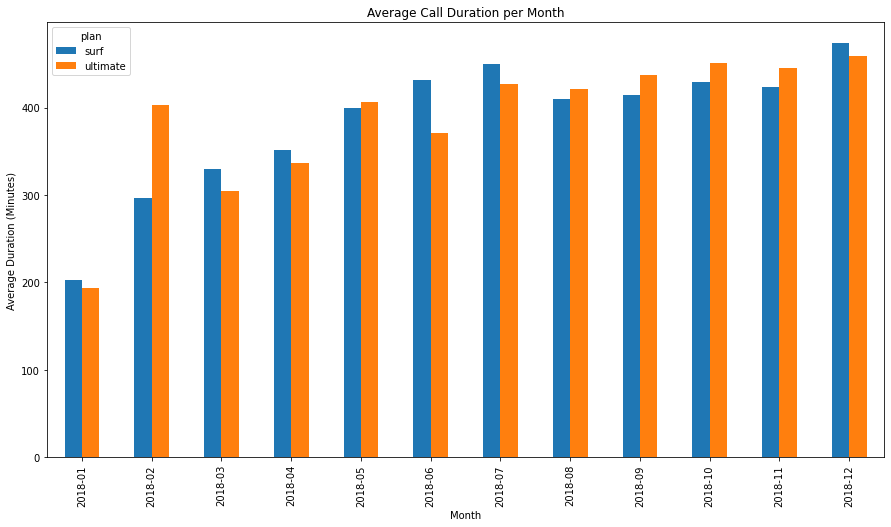

In [73]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

calls_chart = monthly_table_full.groupby(['plan','month'])['charged_duration'].mean()

calls_chart.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Average Duration (Minutes)',
                                   xlabel='Month',
                                   title='Average Call Duration per Month'
                                  )
plt.show()

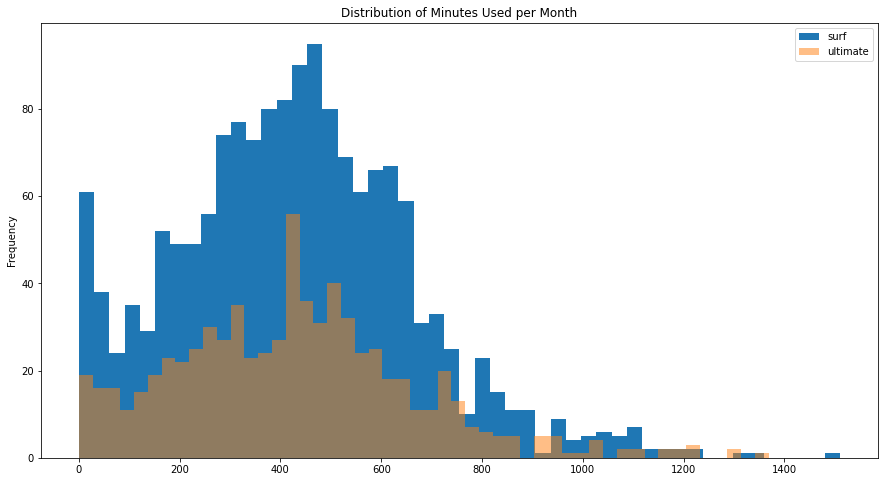

In [74]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
#     Distributions look largely similar, around 400 minutes 
#     with a cluster of low minute users and outlier right tail high minute users


monthly_table_full[monthly_table_full['plan']=='surf']['charged_duration'].plot(kind='hist',bins=50,figsize=[15,8],
                                                                                title='Distribution of Minutes Used per Month'
                                                                               )
monthly_table_full[monthly_table_full['plan']=='ultimate']['charged_duration'].plot(kind='hist',bins=50,alpha=0.5)

plt.legend(['surf','ultimate'])
plt.show()

It looks like user behavior is similar between plans for calls:

In [75]:
monthly_table_full.pivot_table(index='plan',
                               values='charged_duration',
                               aggfunc=['mean', 'var','std', 'median']
                              )

,mean,var,std,median
,charged_duration,charged_duration,charged_duration,charged_duration
plan,,,,
surf,428.749523,54968.279461,234.453150,425.0
ultimate,430.450000,57844.464812,240.508762,424.0


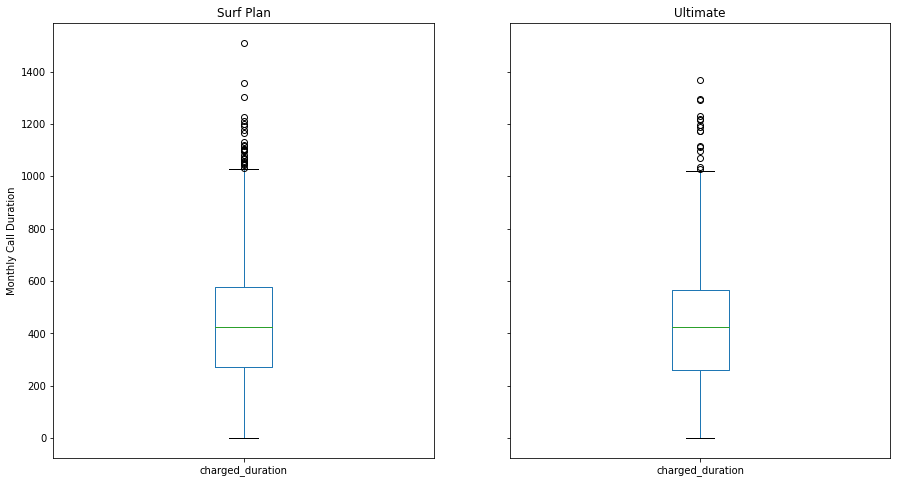

In [76]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, sharey=True)

# plot the first boxplot on the first subplot
monthly_table_full[monthly_table_full['plan'] == 'surf']['charged_duration'].plot(kind='box', ax=axs[0], figsize=[15,8],
                                                                                 ylabel='Monthly Call Duration')

# plot the second boxplot on the second subplot
monthly_table_full[monthly_table_full['plan'] == 'ultimate']['charged_duration'].plot(kind='box', ax=axs[1])

# set labels for the subplots
axs[0].set_title('Surf Plan')
axs[1].set_title('Ultimate')

# show the plot
plt.show()

**Observations:**
- User behavior is remarkably similar between the 2 plans 
- The distributions are similar

### Messages

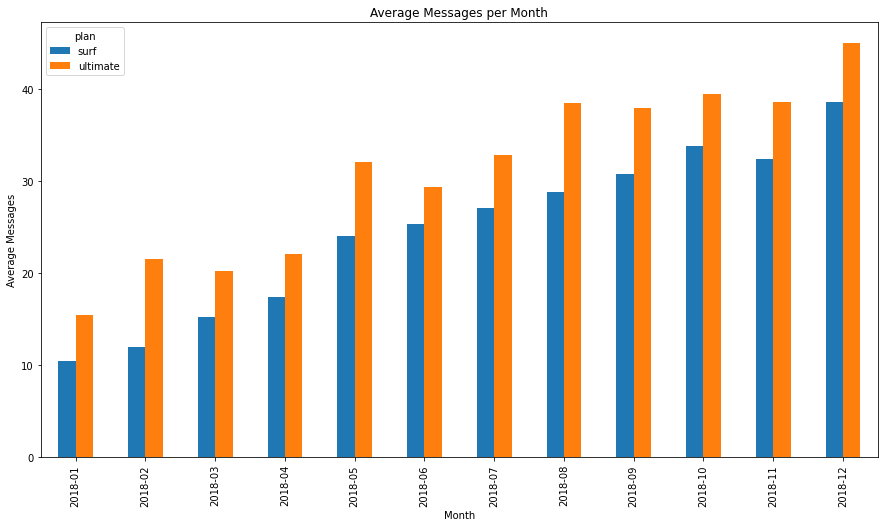

In [77]:
# Compare the number of messages users of each plan tend to send each month

msg_chart = monthly_table_full.groupby(['plan','month'])['messages'].mean()

msg_chart.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Average Messages',
                                   xlabel='Month',
                                 title='Average Messages per Month'
                                  )
plt.show()

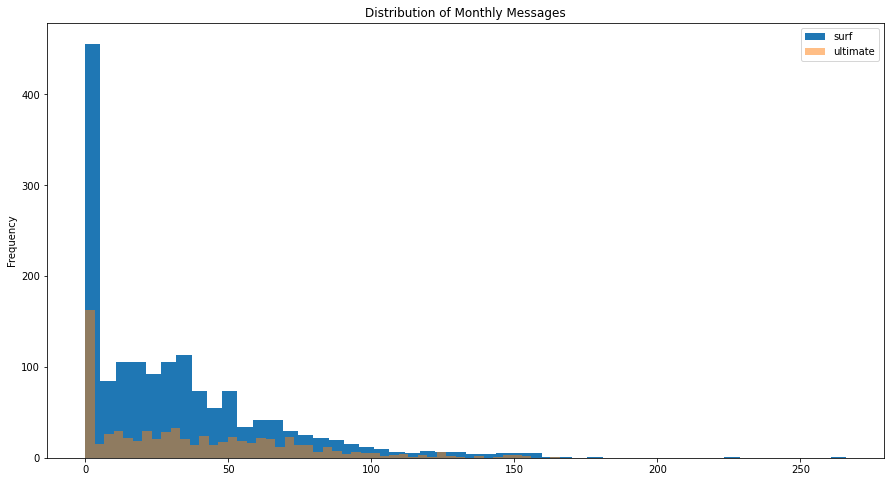

In [78]:
# Many users don't send any messages at all on both plans 

monthly_table_full[monthly_table_full['plan']=='surf']['messages'].plot(kind='hist',bins=50,figsize=[15,8],
                                                                       title='Distribution of Monthly Messages')
monthly_table_full[monthly_table_full['plan']=='ultimate']['messages'].plot(kind='hist',bins=50,alpha=0.5)

plt.legend(['surf','ultimate'])
plt.show()

It looks like behavior is similar between plans for messaging:

In [79]:
# Calculate the mean and the variance of the monthly call duration

monthly_table_full.pivot_table(index='plan',
                               values='messages',
                               aggfunc=['mean', 'var','std', 'median']
                              )

,mean,var,std,median
,messages,messages,messages,messages
plan,,,,
surf,31.159568,1126.724522,33.566717,24.0
ultimate,37.551389,1208.756744,34.767179,30.0


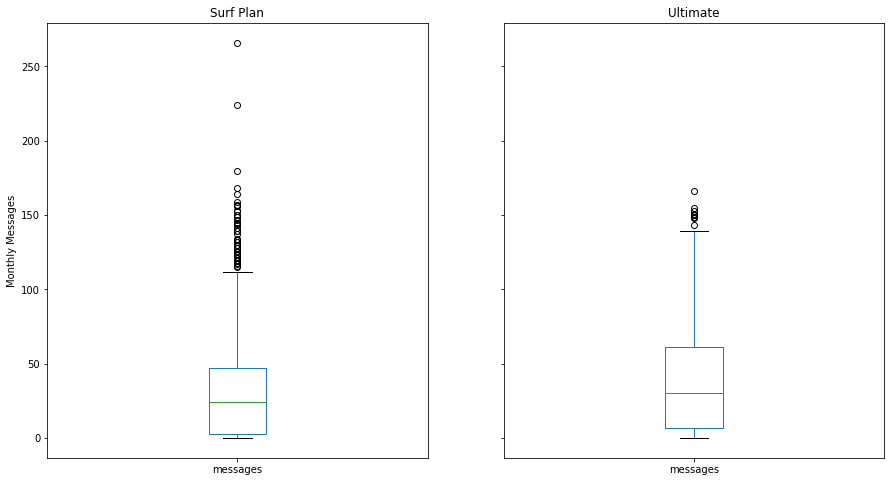

In [80]:
# Plot a boxplot to visualize the distribution of monthly message usage

# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, sharey=True)

# plot the first boxplot on the first subplot
monthly_table_full[monthly_table_full['plan'] == 'surf']['messages'].plot(kind='box', ax=axs[0], figsize=[15,8],
                                                                         ylabel='Monthly Messages')

# plot the second boxplot on the second subplot
monthly_table_full[monthly_table_full['plan'] == 'ultimate']['messages'].plot(kind='box', ax=axs[1])

# set labels for the subplots
axs[0].set_title('Surf Plan')
axs[1].set_title('Ultimate')

# show the plot
plt.show()

**Observations:**
- Users of the ultimate plan seem to send more messages on average, but there are more extreme outliers on the surf plan

### Internet

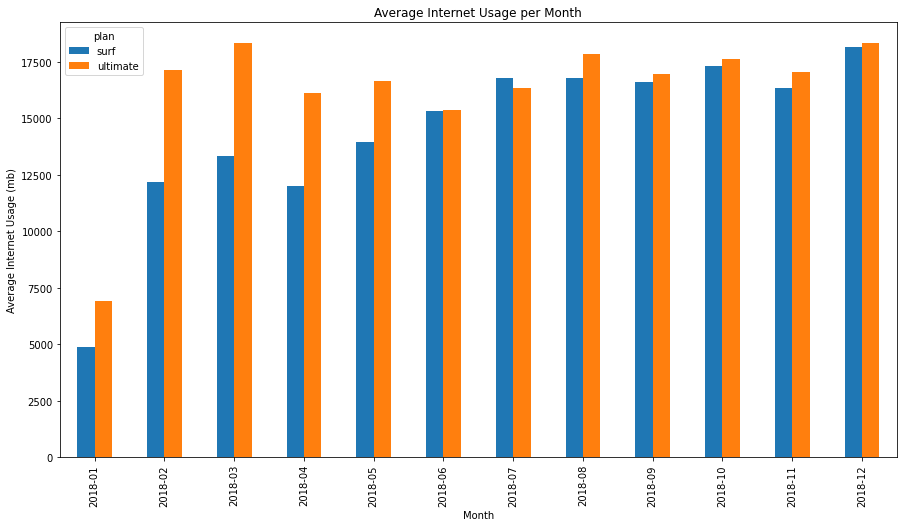

In [81]:
# Compare the amount of internet traffic consumed by users per plan

mb_chart = monthly_table_full.groupby(['plan','month'])['mb_used'].mean()

mb_chart.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Average Internet Usage (mb)',
                                   xlabel='Month',
                                title='Average Internet Usage per Month'
                                  )
plt.show()

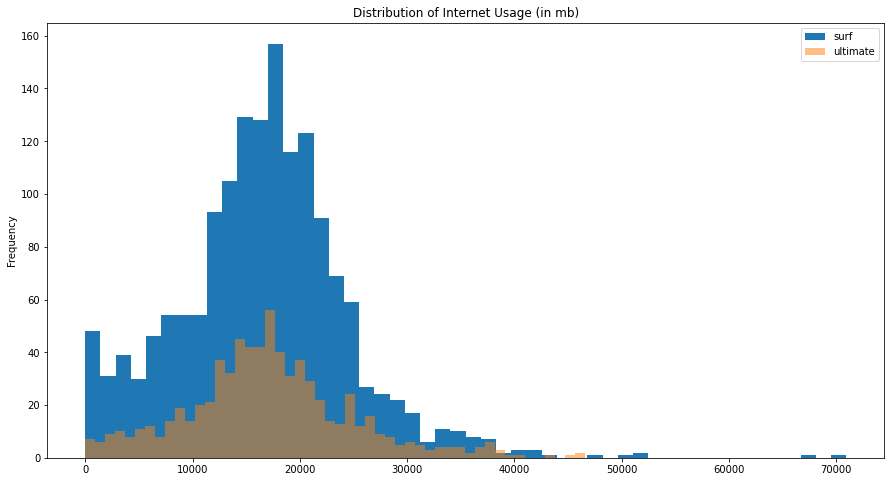

In [82]:
monthly_table_full[monthly_table_full['plan']=='surf']['mb_used'].plot(kind='hist',bins=50,figsize=[15,8],
                                                                      title='Distribution of Internet Usage (in mb)')
monthly_table_full[monthly_table_full['plan']=='ultimate']['mb_used'].plot(kind='hist',bins=50,alpha=0.5)

plt.legend(['surf','ultimate'])
plt.show()

Internet usage also isn't vastly different:

In [83]:
# Calculate the mean and the variance of internet usage

monthly_table_full.pivot_table(index='plan',
                               values='mb_used',
                               aggfunc=['mean', 'var','std', 'median']
                              )

,mean,var,std,median
,mb_used,mb_used,mb_used,mb_used
plan,,,,
surf,16558.283490,6.421640e+07,8013.513327,16829.31
ultimate,17214.699694,6.165229e+07,7851.897435,16858.34


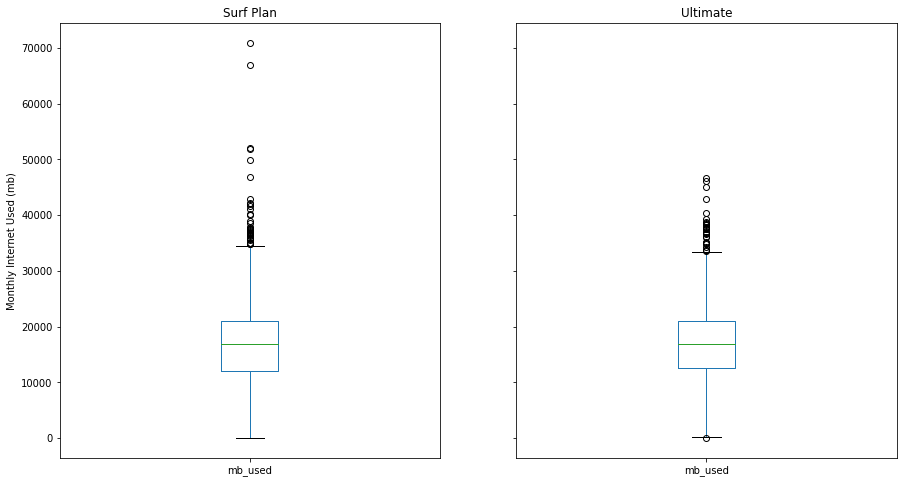

In [84]:
# Plot a boxplot to visualize the distribution of internet usage

# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, sharey=True)

# plot the first boxplot on the first subplot
monthly_table_full[monthly_table_full['plan'] == 'surf']['mb_used'].plot(kind='box', ax=axs[0], figsize=[15,8],
                                                                        ylabel='Monthly Internet Used (mb)')

# plot the second boxplot on the second subplot
monthly_table_full[monthly_table_full['plan'] == 'ultimate']['mb_used'].plot(kind='box', ax=axs[1])

# set labels for the subplots
axs[0].set_title('Surf Plan')
axs[1].set_title('Ultimate')

# show the plot
plt.show()

**Observations:** 
- Usage is remarkably similar between plans, but surf has more outliers on the right tail

## Revenue

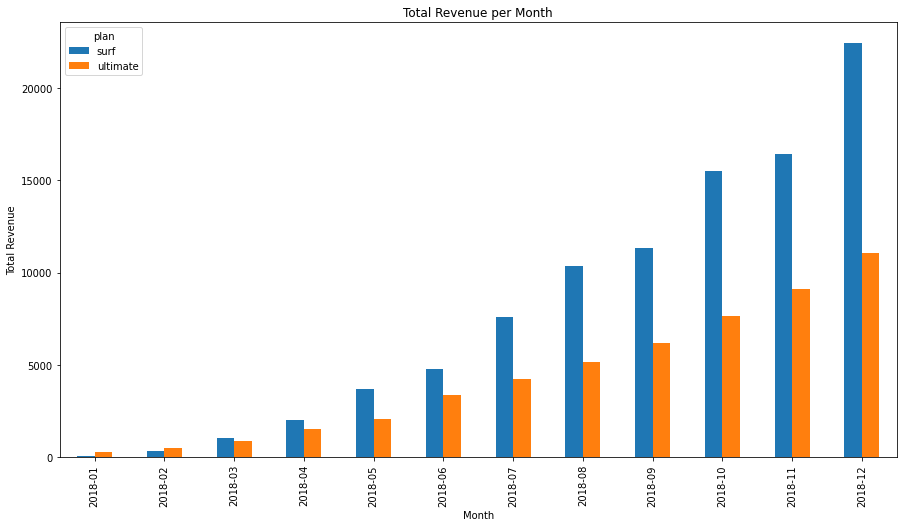

In [85]:
# Looking at average total revenue per plan by month
total_rev_chart = monthly_table_full.groupby(['plan','month'])['total_rev'].sum()

total_rev_chart.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Total Revenue',
                                   xlabel='Month',
                                    title='Total Revenue per Month'
                                  )
plt.show()

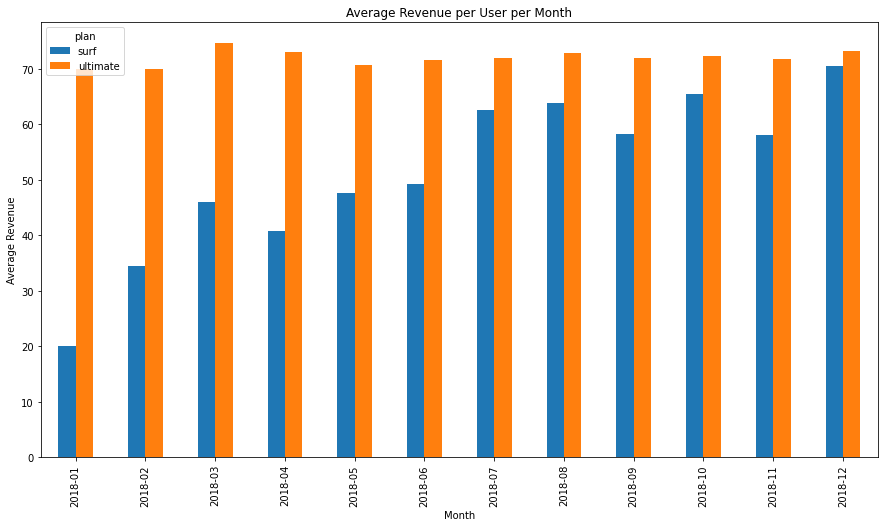

In [86]:
# Looking at average total revenue per user by month
rev_chart = monthly_table_full.groupby(['plan','month'])['total_rev'].mean()

rev_chart.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Average Revenue',
                                   xlabel='Month',
                                 title='Average Revenue per User per Month'
                                  )
plt.show()

NameError: name 'surf_min' is not defined

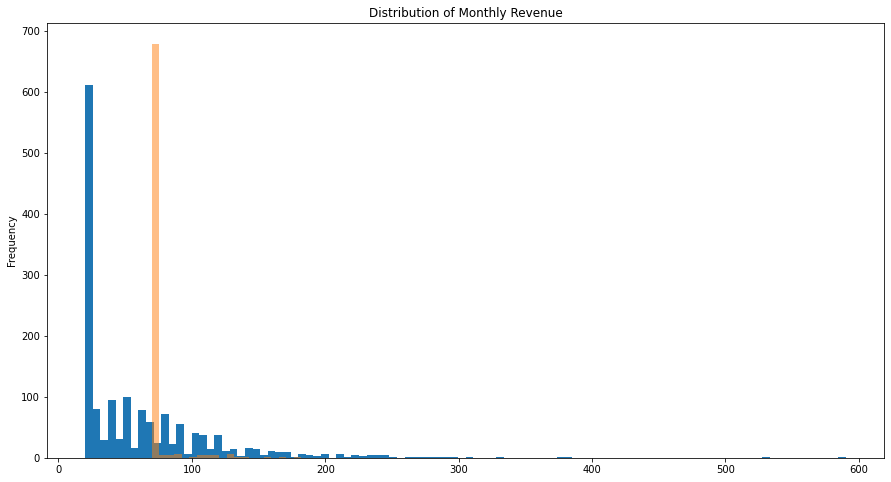

In [87]:
# The vast majority of ultimate users spend the monthly plan cost, meaning they do not use in excess of the plan
# Most frequently, users on surf also pay the monthly $20 but there's a huge range

monthly_table_full[monthly_table_full['plan']=='surf']['total_rev'].plot(kind='hist',bins=100,figsize=[15,8],
                                                                        title='Distribution of Monthly Revenue')
monthly_table_full[monthly_table_full['plan']=='ultimate']['total_rev'].plot(kind='hist',bins=20,alpha=0.5)

plt.xticks(np.arange(min(surf_min,ult_min), max(surf_max,ult_max), 20))
plt.legend(['surf','ultimate'])
plt.show()

In [88]:
# Looking at descriptive stats incl. range 

monthly_table_full.pivot_table(index='plan',
                               values='total_rev',
                               aggfunc=['mean', 'var','std', 'median', 'min', 'max']
                              )

,mean,var,std,median,min,max
,total_rev,total_rev,total_rev,total_rev,total_rev,total_rev
plan,,,,,,
surf,60.706408,3067.835152,55.388042,40.36,20.0,590.37
ultimate,72.313889,129.848486,11.395108,70.00,70.0,182.00


In [89]:
# Some users are paying incredible high amounts. Let's take a lookb
#     All of these outliers are on the Surf plan 

monthly_table_full.sort_values(by='total_rev',ascending=False).head(50)

,user_id,month,calls,charged_duration,messages,sessions,mb_used,charged_mb,plan,city,...,usd_per_message,usd_per_minute,excess_duration,excess_messages,excess_mb_used,call_rev,msg_rev,int_rev,excess_rev,total_rev
1756,1379,2018-12,144.0,1103.0,126.0,132.0,70931.59,70000.0,surf,"Grand Rapids-Kentwood, MI MSA",...,0.03,0.03,603.0,76.0,54640.0,18.09,2.28,550.0,570.37,590.37
570,1121,2018-12,0.0,0.0,97.0,135.0,66863.89,66000.0,surf,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",...,0.03,0.03,0.0,47.0,50640.0,0.00,1.41,510.0,511.41,531.41
1361,1292,2018-12,28.0,144.0,0.0,96.0,52034.66,51000.0,surf,"Dallas-Fort Worth-Arlington, TX MSA",...,0.03,0.03,0.0,0.0,35640.0,0.00,0.00,360.0,360.00,380.00
1357,1292,2018-08,42.0,323.0,0.0,109.0,51809.35,51000.0,surf,"Dallas-Fort Worth-Arlington, TX MSA",...,0.03,0.03,0.0,0.0,35640.0,0.00,0.00,360.0,360.00,380.00
1128,1240,2018-08,161.0,1095.0,15.0,96.0,49950.58,49000.0,surf,"Baton Rouge, LA MSA",...,0.03,0.03,595.0,0.0,33640.0,17.85,0.00,340.0,357.85,377.85
1359,1292,2018-10,42.0,303.0,0.0,91.0,46868.75,46000.0,surf,"Dallas-Fort Worth-Arlington, TX MSA",...,0.03,0.03,0.0,0.0,30640.0,0.00,0.00,310.0,310.00,330.00
1130,1240,2018-10,162.0,1194.0,9.0,89.0,42128.84,42000.0,surf,"Baton Rouge, LA MSA",...,0.03,0.03,694.0,0.0,26640.0,20.82,0.00,270.0,290.82,310.82
1132,1240,2018-12,164.0,1119.0,18.0,85.0,41729.17,41000.0,surf,"Baton Rouge, LA MSA",...,0.03,0.03,619.0,0.0,25640.0,18.57,0.00,260.0,278.57,298.57
933,1194,2018-11,0.0,0.0,62.0,77.0,42866.10,42000.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",...,0.03,0.03,0.0,12.0,26640.0,0.00,0.36,270.0,270.36,290.36
1288,1272,2018-12,93.0,629.0,59.0,138.0,41059.97,41000.0,surf,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",...,0.03,0.03,129.0,9.0,25640.0,3.87,0.27,260.0,264.14,284.14


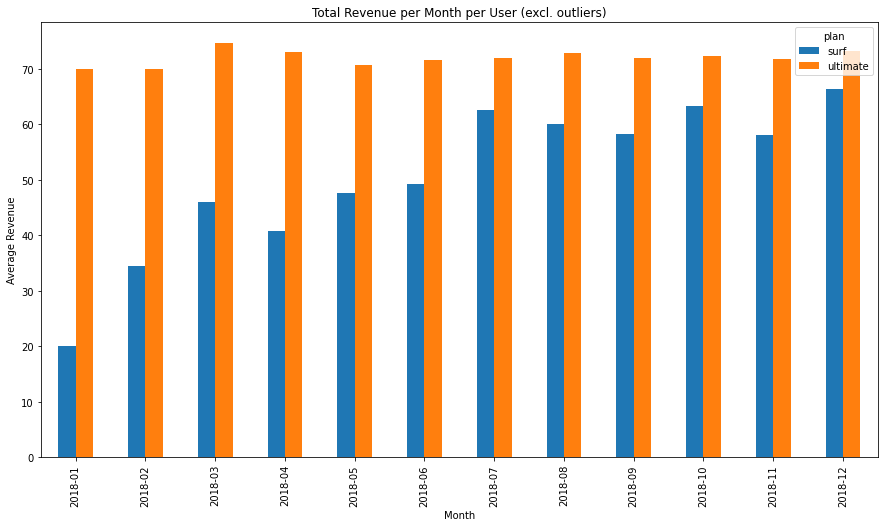

In [90]:
# If I drop the ~10 biggest outliers (total_rev > 300) how will the average revenue look?
#     Trend is slightly smaller but roughly the same

# Looking at average total revenue per user by month
rev_chart = monthly_table_full[monthly_table_full['total_rev']<300].groupby(['plan','month'])['total_rev'].mean()

rev_chart.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Average Revenue',
                                   xlabel='Month',
                                 title='Total Revenue per Month per User (excl. outliers)'
                                  )
plt.show()

Revenue wise there is a huge difference between users. Which makes sense since their usage isn't much different, but the way they are charged is very different. Surf users have much higher variance. 

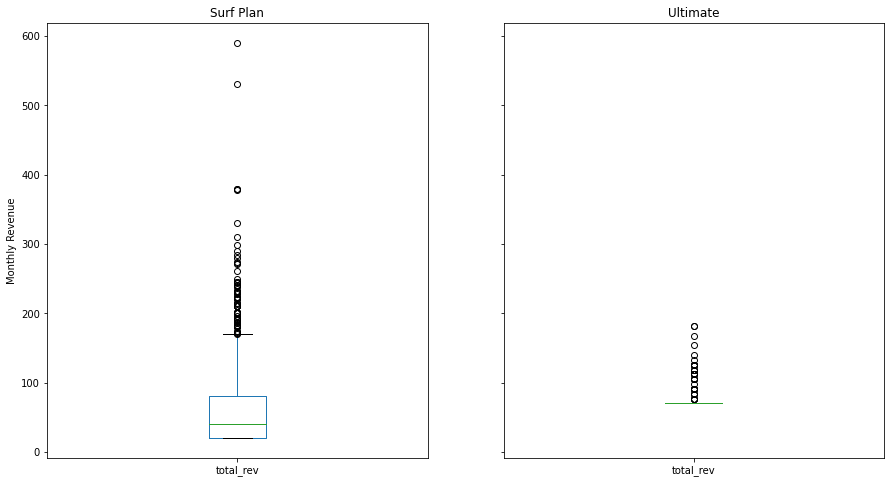

In [91]:
# Plot a boxplot to visualize the distribution of total revenue 

# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, sharey=True)

# plot the first boxplot on the first subplot
monthly_table_full[monthly_table_full['plan'] == 'surf']['total_rev'].plot(kind='box', ax=axs[0], figsize=[15,8],
                                                                          ylabel='Monthly Revenue')

# plot the second boxplot on the second subplot
monthly_table_full[monthly_table_full['plan'] == 'ultimate']['total_rev'].plot(kind='box', ax=axs[1])

# set labels for the subplots
axs[0].set_title('Surf Plan')
axs[1].set_title('Ultimate')

# show the plot
plt.show()

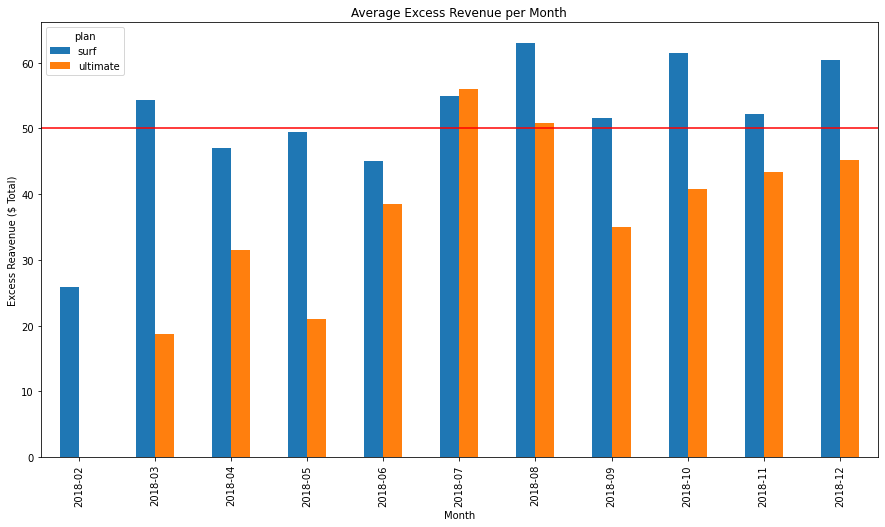

In [92]:
# Looking at excess revenue (in excess of the plan monthly cost) per customer for each plan

excess_chart = monthly_table_full.query("excess_rev > 0").groupby(['plan','month'])['excess_rev'].mean()

excess_chart.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Excess Reavenue ($ Total)',
                                   xlabel='Month',
                                   title='Average Excess Revenue per Month')

# Excess revenue from surf has to be at least $50 to be = to ultimate base costs (without considering excess ultimate rev)
plt.axhline(y=50, color='r') 
plt.show()

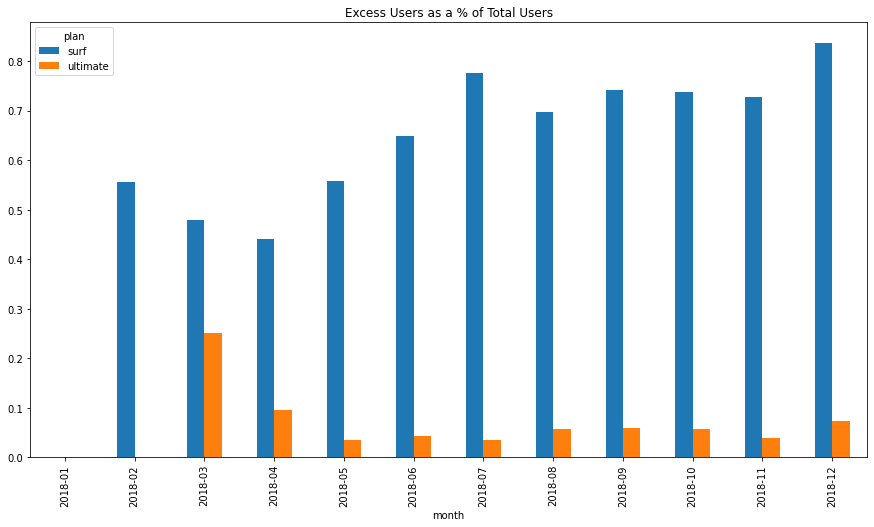

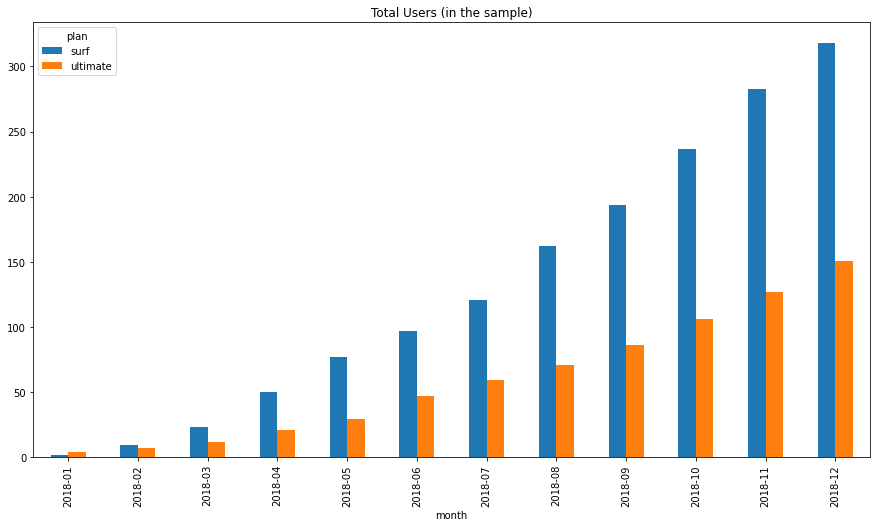

In [93]:
# Looking at percentage of users that user more than their plan allocation 

a = monthly_table_full.query("excess_rev > 0").groupby(['plan','month'])['user_id'].count()
b = monthly_table_full.groupby(['plan','month'])['user_id'].count()

excess_total = pd.concat([a,b],axis=1)
excess_total.columns = ['excess_users', 'total_users']

excess_total['percentage'] = excess_total['excess_users'] / excess_total['total_users']
excess_total['percentage'].unstack(level='plan').plot(kind='bar',figsize=[15,8],title='Excess Users as a % of Total Users')

# Checking the number of surf vs. ultiamte users
#     There are a lot more surf users, roughly ~2x as many 
b.unstack(level='plan').plot(kind='bar',title='Total Users (in the sample)',figsize=[15,8])

plt.show()

### Alternative Revenue Scenario 
**Let's see what revenue would look like if Surf users were charged on the ultimate plan**

In [94]:
all_ultimate = monthly_table_full.copy()

# Calculating usage differential vs. plan allotments 
all_ultimate['excess_duration'] = all_ultimate['charged_duration'] - 3000
all_ultimate['excess_messages'] = all_ultimate['messages'] - 1000
all_ultimate['excess_mb_used'] = all_ultimate['charged_mb'] - 30720

# Setting negative values to zero
all_ultimate['excess_duration'] = [0 if x < 0 else x for x in all_ultimate['excess_duration']] 
all_ultimate['excess_messages'] = [0 if x < 0 else x for x in all_ultimate['excess_messages']] 
all_ultimate['excess_mb_used'] = [0 if x < 0 else x for x in all_ultimate['excess_mb_used']] 

# Calculating revenue on excess usage, and rounding mb_used before charging per plan docs
all_ultimate['call_rev'] = all_ultimate['excess_duration'] * 0.01
all_ultimate['msg_rev'] = all_ultimate['excess_messages'] * 0.01
all_ultimate['int_rev'] = (all_ultimate['excess_mb_used']/1000).apply(np.ceil) * 7

# Calculate the monthly revenue for each user
all_ultimate['excess_rev'] = all_ultimate['call_rev'] + all_ultimate['msg_rev'] + all_ultimate['int_rev']
all_ultimate['total_rev'] = all_ultimate['excess_rev'] + 70

In [95]:
# Looking at the highest spenders 
#     Similar to before, but they spend less now 
all_ultimate.sort_values(by='total_rev',ascending=False).head(10)

,user_id,month,calls,charged_duration,messages,sessions,mb_used,charged_mb,plan,city,...,usd_per_message,usd_per_minute,excess_duration,excess_messages,excess_mb_used,call_rev,msg_rev,int_rev,excess_rev,total_rev
1756,1379,2018-12,144.0,1103.0,126.0,132.0,70931.59,70000.0,surf,"Grand Rapids-Kentwood, MI MSA",...,0.03,0.03,0,0,39280.0,0.0,0.0,280.0,280.0,350.0
570,1121,2018-12,0.0,0.0,97.0,135.0,66863.89,66000.0,surf,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",...,0.03,0.03,0,0,35280.0,0.0,0.0,252.0,252.0,322.0
1361,1292,2018-12,28.0,144.0,0.0,96.0,52034.66,51000.0,surf,"Dallas-Fort Worth-Arlington, TX MSA",...,0.03,0.03,0,0,20280.0,0.0,0.0,147.0,147.0,217.0
1357,1292,2018-08,42.0,323.0,0.0,109.0,51809.35,51000.0,surf,"Dallas-Fort Worth-Arlington, TX MSA",...,0.03,0.03,0,0,20280.0,0.0,0.0,147.0,147.0,217.0
1128,1240,2018-08,161.0,1095.0,15.0,96.0,49950.58,49000.0,surf,"Baton Rouge, LA MSA",...,0.03,0.03,0,0,18280.0,0.0,0.0,133.0,133.0,203.0
2243,1490,2018-12,50.0,368.0,0.0,94.0,46215.51,46000.0,ultimate,"Sacramento–Roseville–Folsom, CA MSA",...,0.01,0.01,0,0,15280.0,0.0,0.0,112.0,112.0,182.0
1359,1292,2018-10,42.0,303.0,0.0,91.0,46868.75,46000.0,surf,"Dallas-Fort Worth-Arlington, TX MSA",...,0.03,0.03,0,0,15280.0,0.0,0.0,112.0,112.0,182.0
102,1028,2018-10,6.0,39.0,73.0,87.0,46595.33,46000.0,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",...,0.01,0.01,0,0,15280.0,0.0,0.0,112.0,112.0,182.0
137,1038,2018-12,78.0,475.0,113.0,87.0,45020.31,44000.0,ultimate,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",...,0.01,0.01,0,0,13280.0,0.0,0.0,98.0,98.0,168.0
1130,1240,2018-10,162.0,1194.0,9.0,89.0,42128.84,42000.0,surf,"Baton Rouge, LA MSA",...,0.03,0.03,0,0,11280.0,0.0,0.0,84.0,84.0,154.0


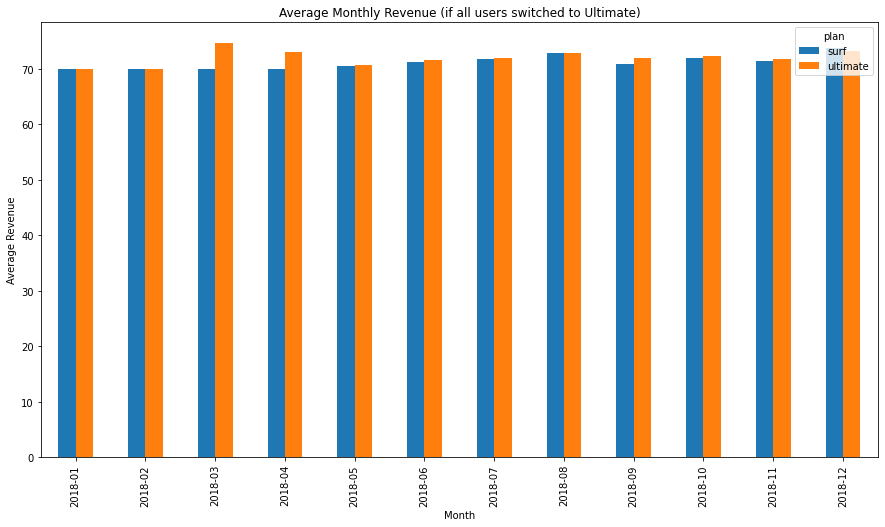

In [96]:
# Looking at average total revenue per user by month
ult_chart = all_ultimate.groupby(['plan','month'])['total_rev'].mean()

ult_chart.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Average Revenue',
                                   xlabel='Month',
                                 title='Average Monthly Revenue (if all users switched to Ultimate)'
                                  )
plt.show()

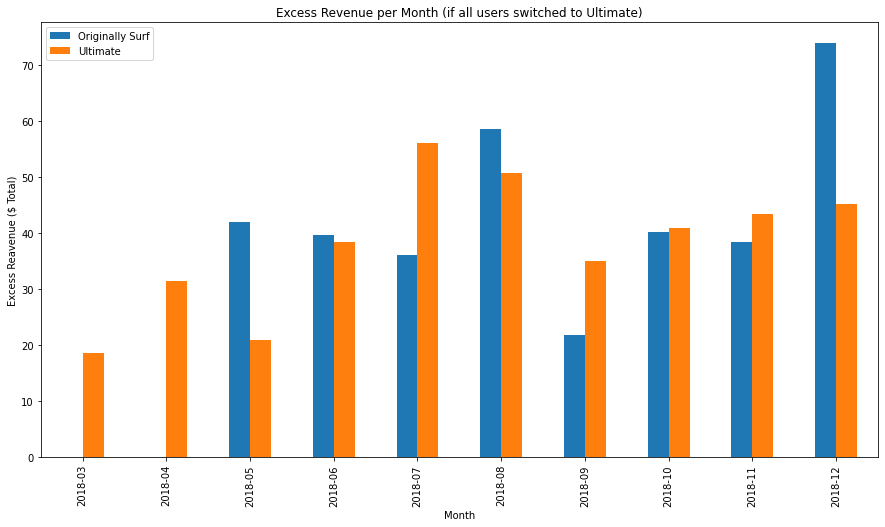

In [97]:
# Looking at excess revenue (in excess of the plan monthly cost) per customer for each plan

ult_excess_chart = all_ultimate.query("excess_rev > 0").groupby(['plan','month'])['excess_rev'].mean()

ult_excess_chart.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Excess Reavenue ($ Total)',
                                   xlabel='Month',
                                       title='Excess Revenue per Month (if all users switched to Ultimate)')

plt.legend(['Originally Surf','Ultimate'])
plt.show()

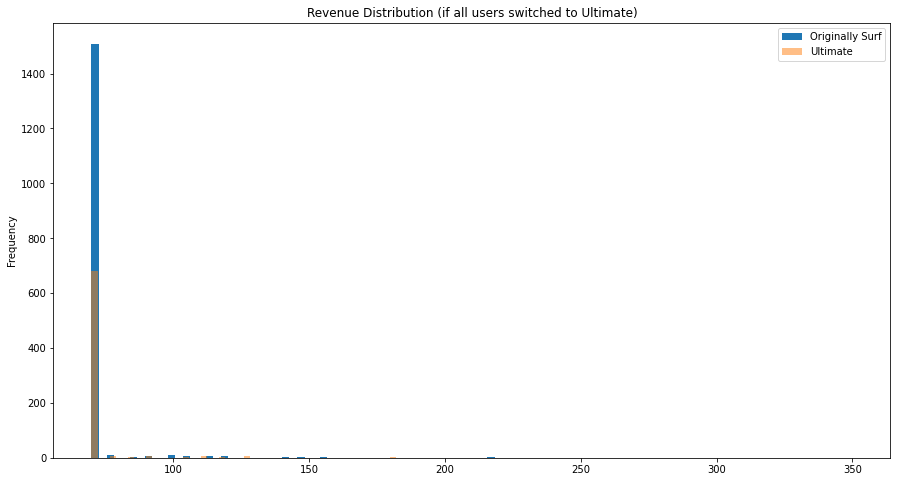

In [98]:
all_ultimate[all_ultimate['plan']=='surf']['total_rev'].plot(kind='hist',bins=100,figsize=[15,8],
                                                            title='Revenue Distribution (if all users switched to Ultimate)')
all_ultimate[all_ultimate['plan']=='ultimate']['total_rev'].plot(kind='hist',bins=50,alpha=0.5)
plt.legend(['Originally Surf','Ultimate'])
plt.show()

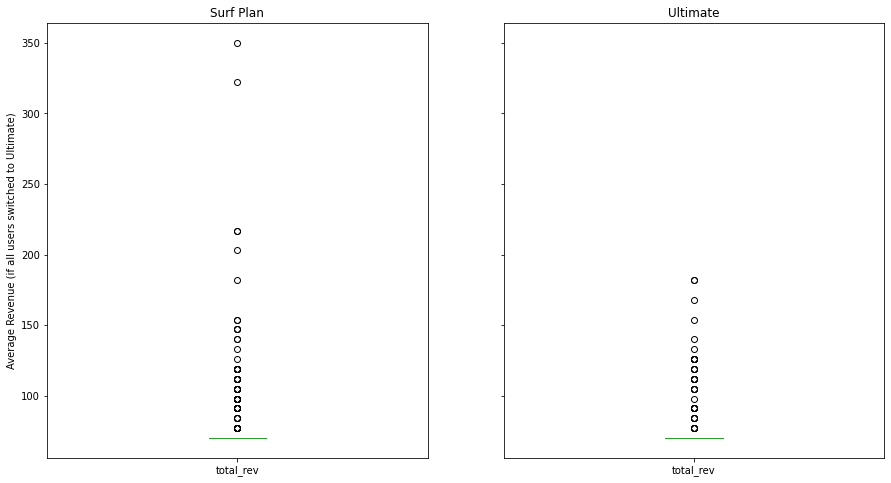

In [99]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, sharey=True)

# plot the first boxplot on the first subplot
all_ultimate[all_ultimate['plan'] == 'surf']['total_rev'].plot(kind='box', ax=axs[0], figsize=[15,8],
                                                              ylabel='Average Revenue (if all users switched to Ultimate)')

# plot the second boxplot on the second subplot
all_ultimate[all_ultimate['plan'] == 'ultimate']['total_rev'].plot(kind='box', ax=axs[1])

# set labels for the subplots
axs[0].set_title('Surf Plan')
axs[1].set_title('Ultimate')

# show the plot
plt.show()

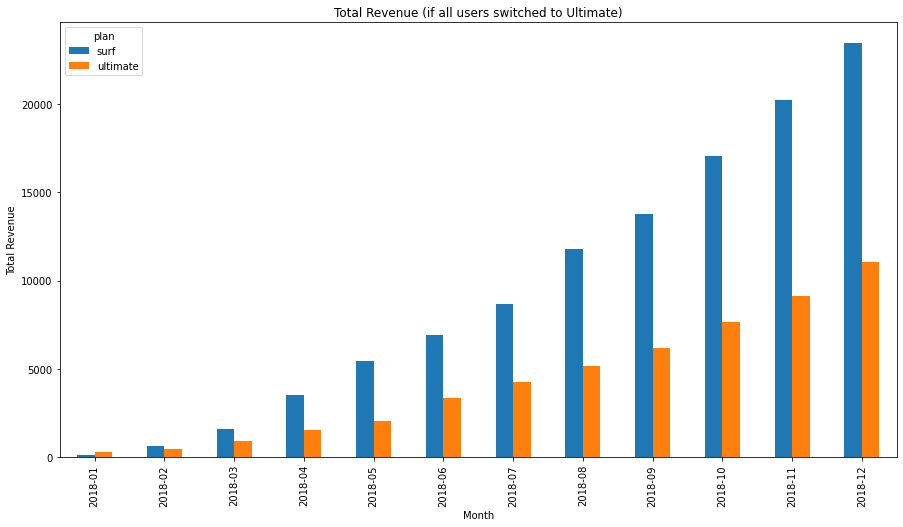

In [100]:
# Looking at total revenue per plan by month
total_rev_chart = all_ultimate.groupby(['plan','month'])['total_rev'].sum()

total_rev_chart.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Total Revenue',
                                   xlabel='Month',
                                       title='Total Revenue (if all users switched to Ultimate)'
                                  )
plt.show()

**Observations:**
- Revenue wise, most ultimate users are around where the plan price is (as in they don't use in excess)
    - See last 2 charts above to see average excess revenue and % of users that have excess
    - It seems like most surf users spend in excess of their plan, but not enough to match the ultimate base price
- Average revenue for the surf plan is lower, but there are a number of outliers
- Also, over the timeframe of the data, average revenue per Surf user caught up to Ultimate.
    - Is this a possible seasonality impact from more phone usage towards the end of the year? 
    - I'd want to dig into why Average Surf revenue went up so much over the year 
    - Confirmed that this is not due to outliers (removed the ~10 highest spenders who were all on Surf > 300 in rev)
- There are a lot more surf users than ultimate users. This preliminary look at the data suggests ultimate users are worth more, since surf users do not spend enough in excess of their plan to match the ultimate users on average. However, there are roughly twice the number of surf users (maybe they are lured in by the low initial price point), so may make up for their decreased average spend with increased size. 
    - If all Surf users switched to ultimate, most would pay around the ultimate base price with some outliers
    - One idea is to promote the ultimate plan heavily to all surf users who have exceeded their plan's included messages, calls, or internet 
    - A switch would increase revenue for most users (decreasing it for some outliers), but even in the case where it decreases revenue from outliers, it may make them "stickier" customers
- Variance is vastly different (as to be expected, if your plan covers most of your usage your spent will be consistently around the cost of your plan or maybe a little more). This means when we run a hypothesis test for equality of two means, we set equal_var to False

## Test statistical hypotheses

Testing the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs:

Using a ttest on the equality of 2 sample means
- The Null hypothesis is that there is no difference in revenue between plans
- The Alternate hypothesis is that ultimate makes more vs. surf despite similar usage

We can also use a 1 tail test to show that the difference in revenue is significant between the ultimate and surf plans:
- We can structure this test using the ultimate's $70 price tag as a reference point
- And test if the surf plan makes significantly less than that 
- The Null hypothesis is that surf does NOT earn less revenue on a statistically significant level

Notes:
- Referencing the revenue bar charts above, revenue was much larger earlier on in the data
- We don't know why usage and revenue increased so much on average throughout the year
    - We can run a test for separate months (i.e. 1H vs. 2H when the data was similar). 

Conclusion:
- Usage is not much different in terms of distribution but ultimate makes more - promote it over surf
    - Stats implies a higher ROI on advertising spend that would result in conversion to Ultimate
- However, this does not mean the Surf plan is not worth continuing - there may be users that would not sign up for ultimate in any scenario

In [101]:
# Test the hypotheses that the two means are equal (null hypothesis)

rev_surf = monthly_table_full[monthly_table_full['plan']=='surf']['total_rev'].dropna()
rev_ult = monthly_table_full[monthly_table_full['plan']=='ultimate']['total_rev'].dropna()

results = st.ttest_ind(rev_surf, rev_ult, equal_var = False)

print('p-value:', results.pvalue)

# Choosing a standard 5% p-value
# Meaning we want there to be less than a 5% chance that the difference between the plans is due to chance

alpha = 0.05

# The Null hypothesis is that the Surf and Ultimate populations have no difference in terms of revenue generated in 2018

if results.pvalue < alpha:
    print("We reject the null hypothesis - The difference between the average of Surf and Ultimate is statistically significant")
else:
    print("We can't reject the null hypothesis - The difference between the average of Surf and Ultimate is NOT statistically significant")

# Looks like the p-value is far lower 
# This means that the difference between the 2 plans is statistically significant and unlikely to occur if the 2 population means are actually equal 

p-value: 3.17039054811355e-15
We reject the null hypothesis - The difference between the average of Surf and Ultimate is statistically significant


In [102]:
# Testing December when revenue/user was about equal
#     December was very similar, cannot reject the null hypothesis that the means are the same

rev_surf = monthly_table_full[
    (monthly_table_full['plan']=='surf') &
    (monthly_table_full['month']=='2018-12')
]['total_rev'].dropna()

rev_ult = monthly_table_full[
    (monthly_table_full['plan']=='ultimate') &
    (monthly_table_full['month']=='2018-12')
]['total_rev'].dropna()

results = st.ttest_ind(rev_surf, rev_ult, equal_var = False)

print('p-value:', results.pvalue)

alpha = 0.05

# The Null hypothesis is that the Surf and Ultimate populations have no difference in terms of revenue generated in December 2018

if results.pvalue < alpha:
    print("We reject the null hypothesis - Dec revenue/user is different on a statistically significant level")
else:
    print("We can't reject the null hypothesis - December revenue/user is NOT different on a statistically significant level")
    
# The difference between the 2 plans is not statistically significant. The p-value is quite high, as to be expected since the means were almost equal

p-value: 0.4931560010824242
We can't reject the null hypothesis - December revenue/user is NOT different on a statistically significant level


In [103]:
# Using a 1 sided test to see if surf makes less than the ultimate plan base price on average

interested_value = 70

alpha = 0.05

results = st.ttest_1samp(rev_surf, interested_value)

print('p-value:', results.pvalue / 2)

# The Null Hypothesis is that Surf revenue is not lower (>=) $70 per month per user 

if results.pvalue / 2 < alpha and rev_surf.mean() < interested_value:
    print("We reject the null hypothesis: Surf revenue was significantly lower than 70 dollars")
else:
    print("We can't reject the null hypothesis: revenue wasn't significantly lower")

p-value: 0.44185266912066934
We can't reject the null hypothesis: revenue wasn't significantly lower


**Looking at geographic factors below:**

Test that average revenue from users in the NY-NJ area is different from other regions
- Will test total revenue
- Will also test revenue per plan, to see if there is a difference 

In [104]:
# Calculate the mean and the variance of the monthly call duration

rev_nynj_avg = monthly_table_full[monthly_table_full['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_rev'].mean()
rev_other_avg = monthly_table_full[monthly_table_full['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_rev'].mean()

rev_nynj_var = monthly_table_full[monthly_table_full['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_rev'].var()
rev_other_var = monthly_table_full[monthly_table_full['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_rev'].var()

rev_nynj_stnd = rev_nynj_var**0.5
rev_other_stnd = rev_other_var**0.5

print("NY/NJ Monthly Average Total Revenue: ", rev_nynj_avg)
print("Other Monthly Average Total Revenue: ", rev_other_avg)
print()
print("NY/NJ Monthly Revenue Variance: ", rev_nynj_var)
print("Other Monthly Revenue Variance: ", rev_other_var)
print()
print("NY/NJ Monthly Revenue Stnd Dev: ", rev_nynj_stnd)
print("Other Monthly Revenue Stnd Dev: ", rev_other_stnd)

NY/NJ Monthly Average Total Revenue:  59.921352785145885
Other Monthly Average Total Revenue:  65.2227713987474

NY/NJ Monthly Revenue Variance:  1895.5456899204246
Other Monthly Revenue Variance:  2225.0479943518917

NY/NJ Monthly Revenue Stnd Dev:  43.537865013346995
Other Monthly Revenue Stnd Dev:  47.170414396652184


In [105]:
# Testing total revenue geographical difference 

rev_nynj = monthly_table_full[monthly_table_full['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_rev'].dropna()
rev_other = monthly_table_full[monthly_table_full['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_rev'].dropna()

# Variances are similar enough 
results = st.ttest_ind(rev_nynj, rev_other, equal_var = True) 

print('p-value:', results.pvalue)

# The Null hypothesis is that NY/NJ and other regions have no difference in terms of revenue 

alpha = 0.05

if results.pvalue < alpha:
    print("We reject the null hypothesis - NY/NJ is significantly different than other regions")
else:
    print("We can't reject the null hypothesis - NY/NJ is NOT significantly different than other regions")

p-value: 0.043557431621342436
We reject the null hypothesis - NY/NJ is significantly different than other regions


While NY/NJ isn't different as a whole, let's look on the plan level:

In [106]:
monthly_table_full['NYNJ'] = ['NYNJ' if x == 'New York-Newark-Jersey City, NY-NJ-PA MSA' else 'Other' for x in monthly_table_full['city']] 

cities = ['NYNJ', 'Other']
plans = ['surf', 'ultimate']

for city in cities:
    for plan in plans:
        df = monthly_table_full[(monthly_table_full['NYNJ']==city) & 
                                (monthly_table_full['plan']==plan)]
        rev_mean = df['total_rev'].mean()
        rev_var = df['total_rev'].var()
        rev_stnd = rev_var**0.5
        print(city, "Monthly Average Total Revenue -", plan.capitalize() + ":", rev_mean)
        print(city, "Monthly Revenue Variance -", plan.capitalize() + ":", rev_var)
        print(city, "Monthly Revenue Stnd Dev -", plan.capitalize() + ":", rev_stnd)
        print()

NYNJ Monthly Average Total Revenue - Surf: 56.789583333333326
NYNJ Monthly Revenue Variance - Surf: 2192.513818153805
NYNJ Monthly Revenue Stnd Dev - Surf: 46.82428662728142

NYNJ Monthly Average Total Revenue - Ultimate: 74.95384615384616
NYNJ Monthly Revenue Variance - Ultimate: 204.76346153846157
NYNJ Monthly Revenue Stnd Dev - Ultimate: 14.30955839774455

Other Monthly Average Total Revenue - Surf: 61.675519429024575
Other Monthly Revenue Variance - Surf: 3281.5827039561696
Other Monthly Revenue Stnd Dev - Surf: 57.28510019155216

Other Monthly Average Total Revenue - Ultimate: 72.05190839694656
Other Monthly Revenue Variance - Ultimate: 121.9544879426664
Other Monthly Revenue Stnd Dev - Ultimate: 11.043300590976703



In [107]:
# Now checking for each plan

# Surf plan:

rev_nynj = monthly_table_full[
    (monthly_table_full['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA') &
    (monthly_table_full['plan']=='surf')
]['total_rev'].dropna()

rev_other = monthly_table_full[
    (monthly_table_full['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA') &
    (monthly_table_full['plan']=='surf')
]['total_rev'].dropna()

# Variances are quite different on the plan level 
results = st.ttest_ind(rev_nynj, rev_other, equal_var = False) 

print('p-value:', results.pvalue)

alpha = 0.05

# The Null hypothesis is that NY/NJ and other regions have no difference in terms of revenue (for Surf users)

if results.pvalue < alpha:
    print("We reject the null hypothesis - Surf rev in NY/NJ is different vs other regions")
else:
    print("We can't reject the null hypothesis - Surf rev in NY/NJ is NOT different vs other regions")

p-value: 0.11593195869050535
We can't reject the null hypothesis - Surf rev in NY/NJ is NOT different vs other regions


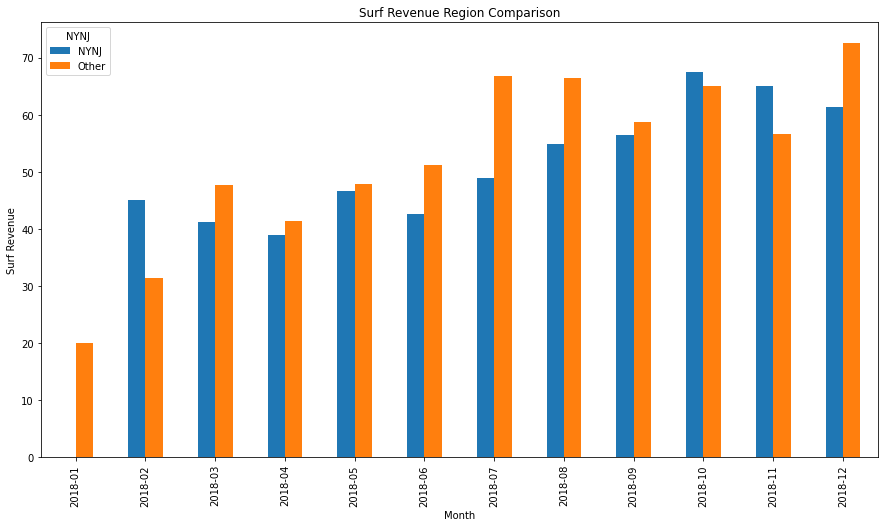

In [108]:
# Let's get some visuals to see the difference 
# There's an issue here if there's no ultimate users in the data before April in NY-NJ 

ult_nyc = monthly_table_full.query("plan == 'surf'").groupby(['NYNJ','month'])['total_rev'].mean()

ult_nyc.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Surf Revenue',
                                   xlabel='Month',
                               title='Surf Revenue Region Comparison'
                                  )

plt.show()

In [109]:
# Ultimate plan:

rev_nynj = monthly_table_full[
    (monthly_table_full['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA') &
    (monthly_table_full['plan']=='ultimate') 
]['total_rev'].dropna()

rev_other = monthly_table_full[
    (monthly_table_full['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA') &
    (monthly_table_full['plan']=='ultimate')
]['total_rev'].dropna()

# Variances are similar enough 
results = st.ttest_ind(rev_nynj, rev_other, equal_var = True) 

print('p-value:', results.pvalue)

alpha = 0.05

# The Null hypothesis is that NY/NJ and other regions have no difference in terms of revenue (for Ultimate users)

if results.pvalue < alpha:
    print("We reject the null hypothesis - Ultimate rev in NY/NJ is different vs other regions")
else:
    print("We can't reject the null hypothesis - Ultimate rev in NY/NJ is NOT different vs other regions")
    
    
# It looks like there is a statistical difference for the ultimate plan
# But the pvalue is not as low as for the test between the plans themselves 

p-value: 0.05012688407875836
We can't reject the null hypothesis - Ultimate rev in NY/NJ is NOT different vs other regions


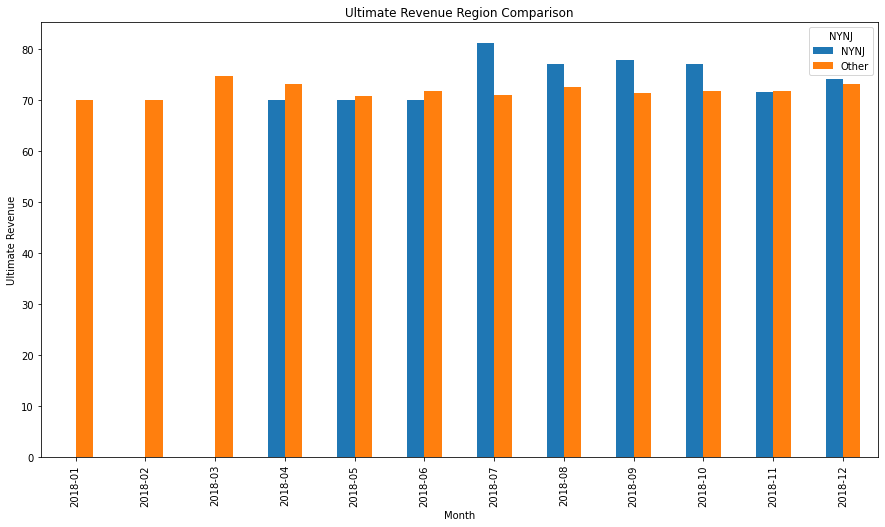

In [110]:
# Let's get some visuals to see the difference 
#     While the difference is not as high as for surf, the standard deviation is lower on ultiamte meaning smaller differences are less statistically likely 
# There were no ultimate users in the data before April in NY-NJ - This should be OK since we are looking at averages 
# But to get more accurate, we can only compare users in the months we have to account for seasonality 
#     Tested the above statistical test adding ""& (monthly_table_full['month'].dt.month > 3)", same p-value

ult_nyc = monthly_table_full.query("plan == 'ultimate'").groupby(['NYNJ','month'])['total_rev'].mean()

ult_nyc.unstack(level=-2).plot(kind='bar',
                                   legend=True,
                                   figsize=[15,8],
                                   ylabel='Ultimate Revenue',
                                   xlabel='Month',
                               title='Ultimate Revenue Region Comparison'
                                  )

plt.show()

## General conclusion

**Conclusions:**
- Ultimate and Surf users generate statistically significantly different revenue per user on an aggregate basis 
- Actual usage across platforms is similar, as seen in the distributions for messages, calls, and internet

**Other Observations:**
- NY/NJ users are not different as a whole, but NY/NJ Ultimate users ARE different in NY/NJ vs. others 
- Churned users are representative of the sample distribution between plans

**Recommendations:**
- Megaline should promote its Ultimate plan heavily to Surf users who have exceeded their "free" usage, perhaps with an offer alongside the monthly bill

**Additional Issues to Explore:**
- Surf revenue per user grew over the year caught up to Ultimate, we want to know if this is a seasonality based difference or a real change in trend
    - For the purposes of this exercise, I'm assuming the whole year is representative and that the "real" behavior of users did not change drastically over the year
    - However, even if Surf user behavior did change over the year, promoting a switch to Ultimate may still be a good business decision if we want to prioritize: 
        - Less variation in revenue (more certainty over revenue, ability to project revenue)
        - User satisfaction (less surprise over bills, and possibly less churn)
        - Possibly stickier customer base